In [31]:
# Importing necessary libraries
import numpy as np
import pandas as pd

# Load datasets
application_df = pd.read_csv("application_data.csv")
previous_df = pd.read_csv("previous_application.csv")
columns_desc = pd.read_csv("columns_description.csv")

# Basic inspection
print("Application Data Shape:", application_df.shape)
print("Previous Application Data Shape:", previous_df.shape)
print("Columns Description Shape:", columns_desc.shape)

# Display top rows
print("\n--- Application Data Sample ---")
print(application_df.head())

print("\n--- Previous Application Data Sample ---")
print(previous_df.head())

print("\n--- Column Description Sample ---")
print(columns_desc.head())


Application Data Shape: (307511, 122)
Previous Application Data Shape: (1670214, 37)
Columns Description Shape: (160, 5)

--- Application Data Sample ---
   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          

In [3]:
# Import necessary libraries
import pandas as pd

# Load datasets using correct file paths
application_df = pd.read_csv("/mnt/data/application_data.csv")
previous_df = pd.read_csv("/mnt/data/previous_application.csv")
columns_desc = pd.read_csv("/mnt/data/columns_description.csv")

# Basic inspection
print("Application Data Shape:", application_df.shape)
print("Previous Application Data Shape:", previous_df.shape)
print("Columns Description Shape:", columns_desc.shape)

# Display top rows
print("\n--- Application Data Sample ---")
print(application_df.head())

print("\n--- Previous Application Data Sample ---")
print(previous_df.head())

print("\n--- Column Description Sample ---")
print(columns_desc.head())


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/application_data.csv'

In [5]:
import pandas as pd

# Load datasets (no folder path needed if files are in same directory)
application_df = pd.read_csv("application_data.csv")
previous_df = pd.read_csv("previous_application.csv")
columns_desc = pd.read_csv("columns_description.csv")

# Basic inspection
print("Application Data Shape:", application_df.shape)
print("Previous Application Data Shape:", previous_df.shape)
print("Columns Description Shape:", columns_desc.shape)

# Display top rows
print("\n--- Application Data Sample ---")
print(application_df.head())

print("\n--- Previous Application Data Sample ---")
print(previous_df.head())

print("\n--- Column Description Sample ---")
print(columns_desc.head())


Application Data Shape: (307511, 122)
Previous Application Data Shape: (1670214, 37)
Columns Description Shape: (160, 5)

--- Application Data Sample ---
   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          

In [7]:
# Step 1.2 - Basic Data Overview

# 1. Data info
print("\n--- Application Data Info ---")
application_df.info()

print("\n--- Previous Application Data Info ---")
previous_df.info()

# 2. Missing values count
print("\n--- Missing Values in Application Data ---")
print(application_df.isnull().sum().sort_values(ascending=False).head(20))

print("\n--- Missing Values in Previous Application Data ---")
print(previous_df.isnull().sum().sort_values(ascending=False).head(20))

# 3. Duplicate check
print("\nDuplicate rows in Application Data:", application_df.duplicated().sum())
print("Duplicate rows in Previous Application Data:", previous_df.duplicated().sum())

# 4. Unique values per column (top 10 most unique)
print("\n--- Unique Values in Application Data (Top 10) ---")
print(application_df.nunique().sort_values(ascending=False).head(10))

print("\n--- Unique Values in Previous Application Data (Top 10) ---")
print(previous_df.nunique().sort_values(ascending=False).head(10))



--- Application Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB

--- Previous Application Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEE

In [9]:
# Drop columns with >40% missing values
application_df_cleaned = application_df.loc[:, application_df.isnull().mean() < 0.4]
previous_df_cleaned = previous_df.loc[:, previous_df.isnull().mean() < 0.4]

print("Application Data Shape After Cleaning:", application_df_cleaned.shape)
print("Previous Application Data Shape After Cleaning:", previous_df_cleaned.shape)


Application Data Shape After Cleaning: (307511, 73)
Previous Application Data Shape After Cleaning: (1670214, 26)


In [11]:
# Fill numeric columns with median
for col in application_df_cleaned.select_dtypes(include=['float64', 'int64']):
    application_df_cleaned[col].fillna(application_df_cleaned[col].median(), inplace=True)

for col in previous_df_cleaned.select_dtypes(include=['float64', 'int64']):
    previous_df_cleaned[col].fillna(previous_df_cleaned[col].median(), inplace=True)

# Fill categorical columns with mode
for col in application_df_cleaned.select_dtypes(include='object'):
    application_df_cleaned[col].fillna(application_df_cleaned[col].mode()[0], inplace=True)

for col in previous_df_cleaned.select_dtypes(include='object'):
    previous_df_cleaned[col].fillna(previous_df_cleaned[col].mode()[0], inplace=True)


/var/folders/zk/hx2ljwgs5vl2j351c99j99hh0000gp/T/ipykernel_52906/1332616531.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  application_df_cleaned[col].fillna(application_df_cleaned[col].median(), inplace=True)
/var/folders/zk/hx2ljwgs5vl2j351c99j99hh0000gp/T/ipykernel_52906/1332616531.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap

In [15]:
# Drop columns with >40% missing values
application_df_cleaned = application_df.loc[:, application_df.isnull().mean() < 0.4].copy()
previous_df_cleaned = previous_df.loc[:, previous_df.isnull().mean() < 0.4].copy()

# Fill numeric columns with median
for col in application_df_cleaned.select_dtypes(include=['float64', 'int64']):
    application_df_cleaned[col] = application_df_cleaned[col].fillna(application_df_cleaned[col].median())

for col in previous_df_cleaned.select_dtypes(include=['float64', 'int64']):
    previous_df_cleaned[col] = previous_df_cleaned[col].fillna(previous_df_cleaned[col].median())

# Fill categorical columns with mode
for col in application_df_cleaned.select_dtypes(include='object'):
    if application_df_cleaned[col].isnull().any():
        application_df_cleaned[col] = application_df_cleaned[col].fillna(application_df_cleaned[col].mode()[0])

for col in previous_df_cleaned.select_dtypes(include='object'):
    if previous_df_cleaned[col].isnull().any():
        previous_df_cleaned[col] = previous_df_cleaned[col].fillna(previous_df_cleaned[col].mode()[0])


In [17]:
# Check if any missing values remain
print("Remaining nulls in Application Data:", application_df_cleaned.isnull().sum().sum())
print("Remaining nulls in Previous Application Data:", previous_df_cleaned.isnull().sum().sum())


Remaining nulls in Application Data: 0
Remaining nulls in Previous Application Data: 0


Target value counts:
 TARGET
0    282686
1     24825
Name: count, dtype: int64

Class Proportions:
 TARGET
0    0.919271
1    0.080729
Name: count, dtype: float64


/var/folders/zk/hx2ljwgs5vl2j351c99j99hh0000gp/T/ipykernel_52906/3771590658.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=application_df_cleaned, x='TARGET', palette='Set2')


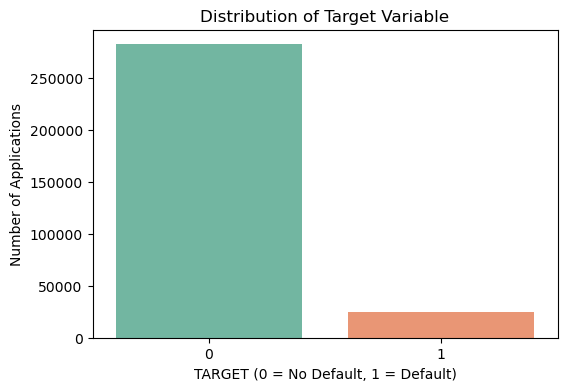

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Value counts
target_counts = application_df_cleaned['TARGET'].value_counts()
print("Target value counts:\n", target_counts)
print("\nClass Proportions:\n", target_counts / target_counts.sum())

# 2. Bar plot of target distribution
plt.figure(figsize=(6,4))
sns.countplot(data=application_df_cleaned, x='TARGET', palette='Set2')
plt.title('Distribution of Target Variable')
plt.xlabel('TARGET (0 = No Default, 1 = Default)')
plt.ylabel('Number of Applications')
plt.show()


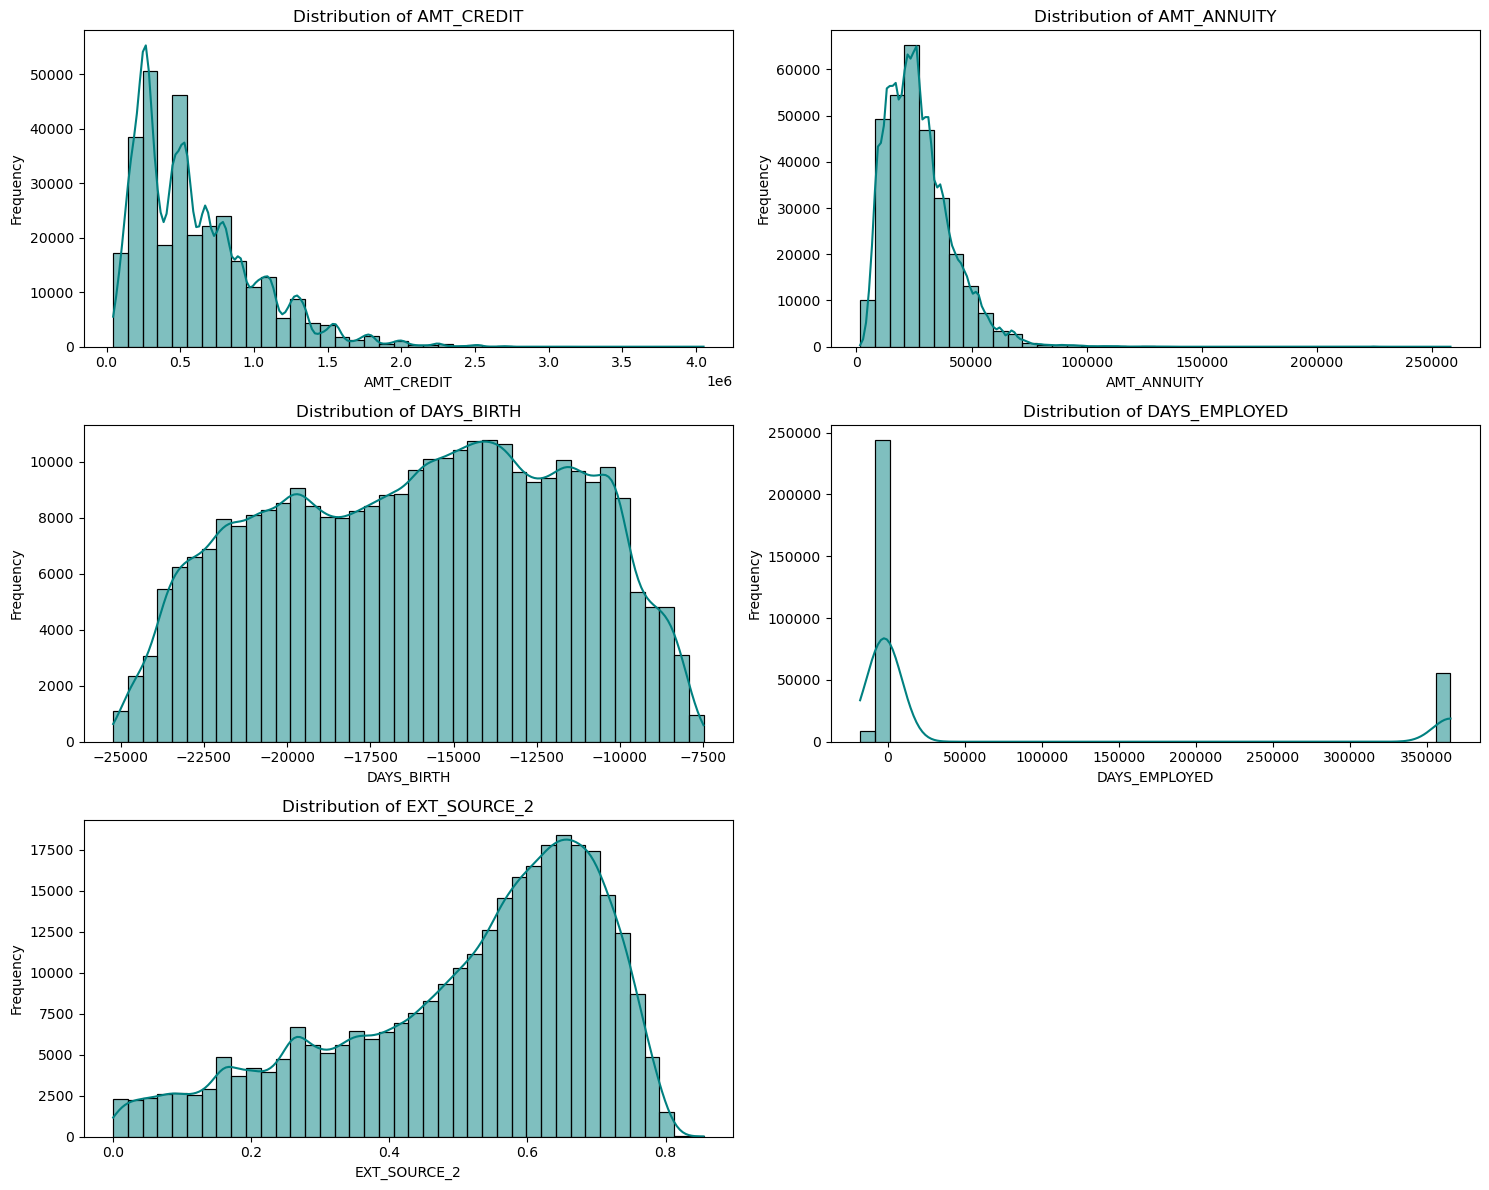

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['AMT_CREDIT', 'AMT_ANNUITY', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'EXT_SOURCE_2']

plt.figure(figsize=(15, 12))

for i, col in enumerate(features, 1):
    plt.subplot(3, 2, i)
    sns.histplot(application_df_cleaned[col], kde=True, color='teal', bins=40)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [23]:
# Convert days to age in years and create a new column
application_df_cleaned['AGE_YEARS'] = (-application_df_cleaned['DAYS_BIRTH'] / 365).round(1)


In [32]:
# Replace 365243 (anomalous value) with NaN
application_df_cleaned['DAYS_EMPLOYED'] = application_df_cleaned['DAYS_EMPLOYED'].replace(365243, np.nan)


In [37]:
# Fill NaN values in DAYS_EMPLOYED with the median
application_df_cleaned['DAYS_EMPLOYED'] = application_df_cleaned['DAYS_EMPLOYED'].fillna(application_df_cleaned['DAYS_EMPLOYED'].median())


In [39]:
# Calculate correlation matrix
correlation_matrix = application_df_cleaned.corr(numeric_only=True)

# Sort correlations with the TARGET variable
target_correlations = correlation_matrix['TARGET'].sort_values(key=abs, ascending=False)

# Display top 10 (excluding TARGET itself)
print(target_correlations[1:11])


EXT_SOURCE_2                  -0.160295
EXT_SOURCE_3                  -0.155892
DAYS_BIRTH                     0.078239
AGE_YEARS                     -0.078237
DAYS_EMPLOYED                  0.063368
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
Name: TARGET, dtype: float64


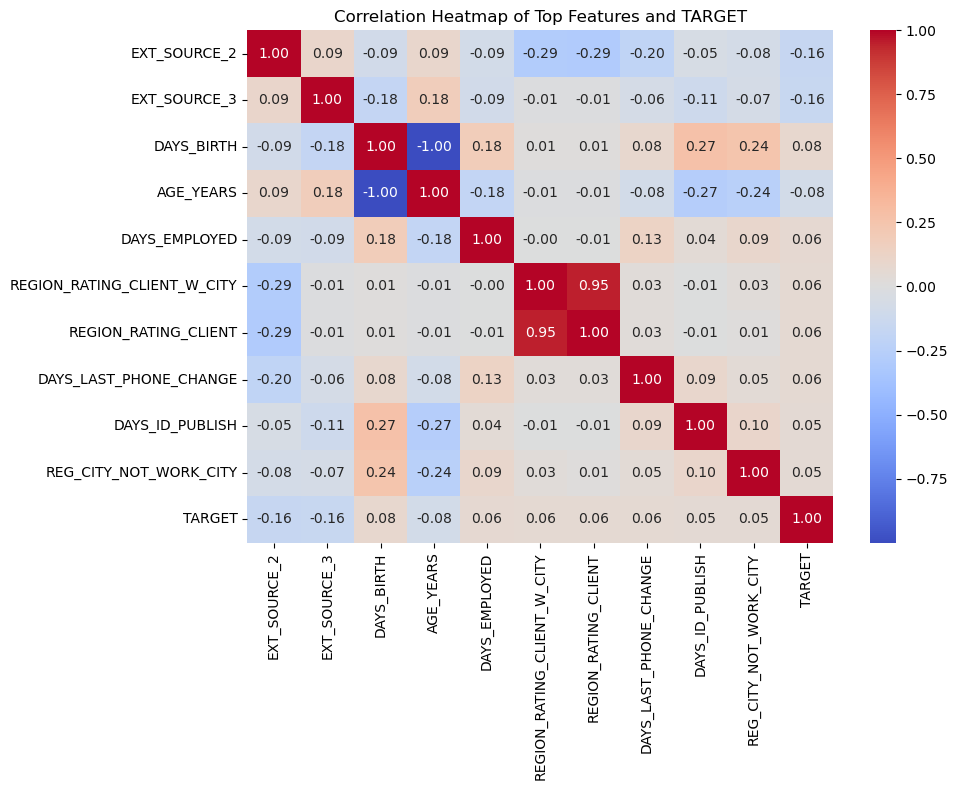

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select top 10 most correlated features (from your output)
top_corr_features = [
    'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'AGE_YEARS',
    'DAYS_EMPLOYED', 'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT',
    'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'REG_CITY_NOT_WORK_CITY', 'TARGET'
]

# Create a correlation matrix
corr_matrix = application_df_cleaned[top_corr_features].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Top Features and TARGET')
plt.tight_layout()
plt.show()


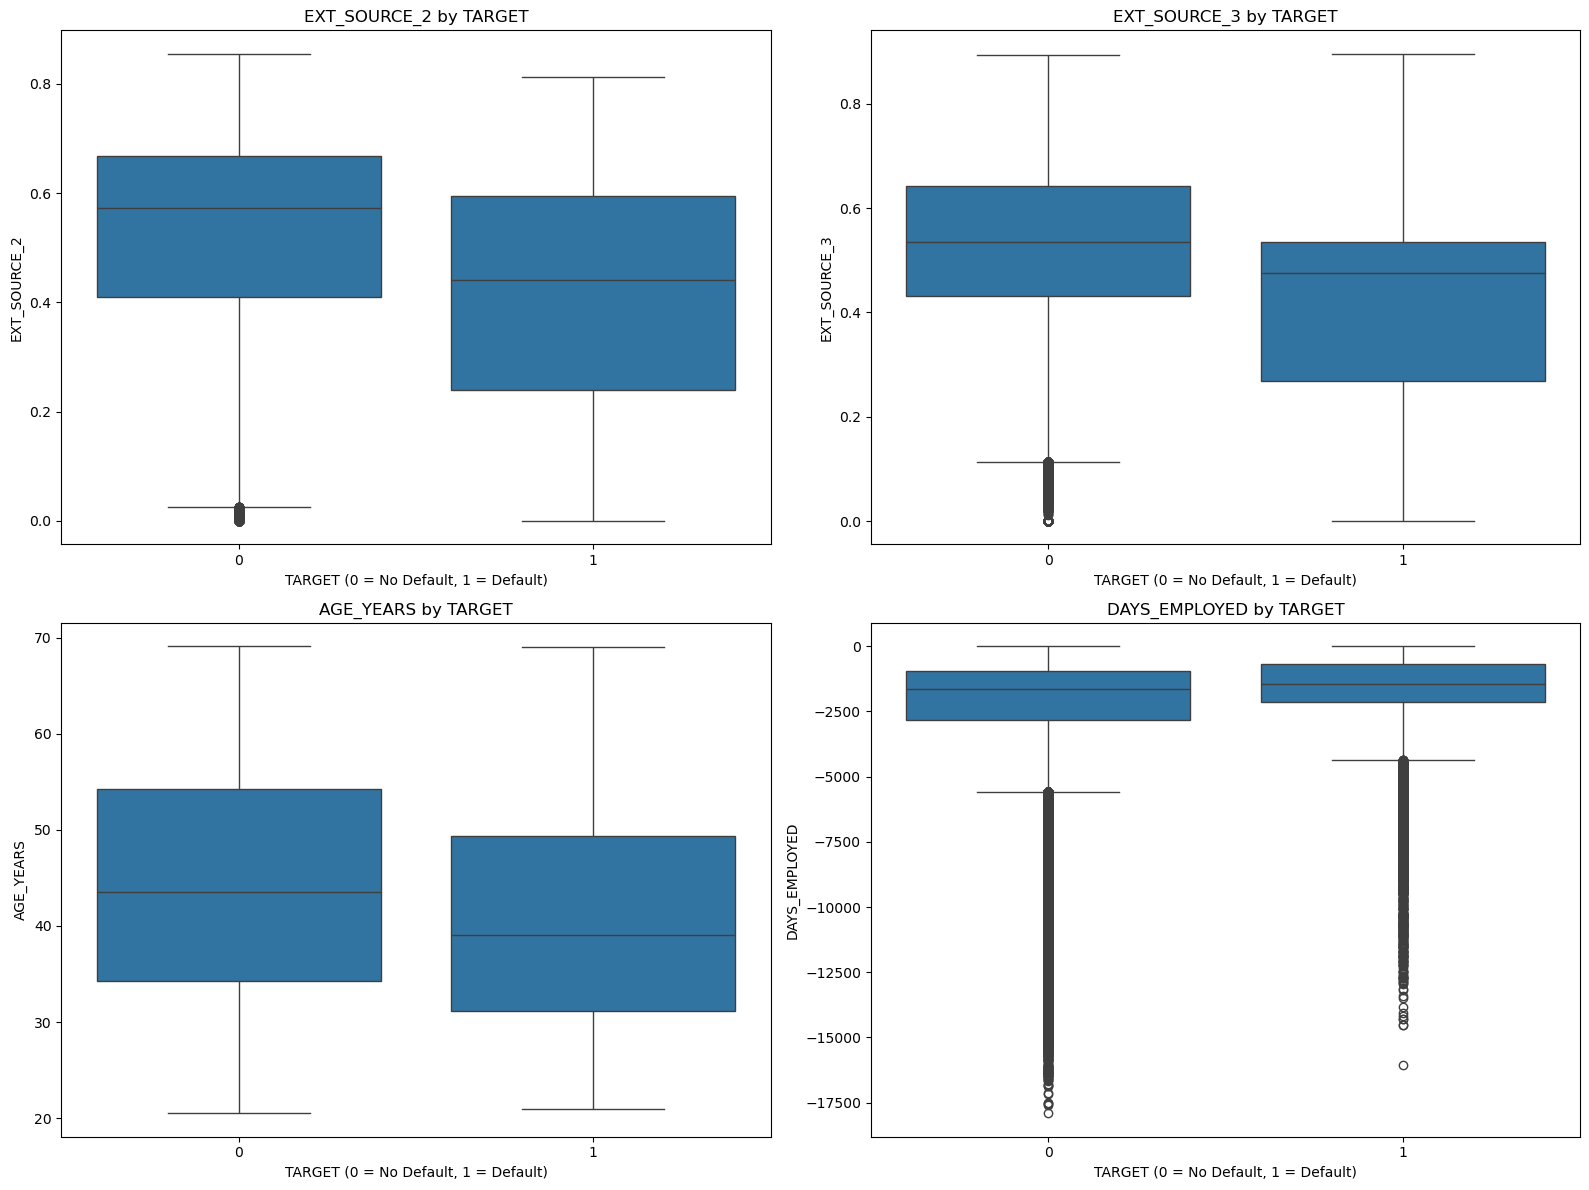

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

top_features = ['EXT_SOURCE_2', 'EXT_SOURCE_3', 'AGE_YEARS', 'DAYS_EMPLOYED']

plt.figure(figsize=(16, 12))

for i, feature in enumerate(top_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=application_df_cleaned, x='TARGET', y=feature)
    plt.title(f'{feature} by TARGET')
    plt.xlabel('TARGET (0 = No Default, 1 = Default)')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


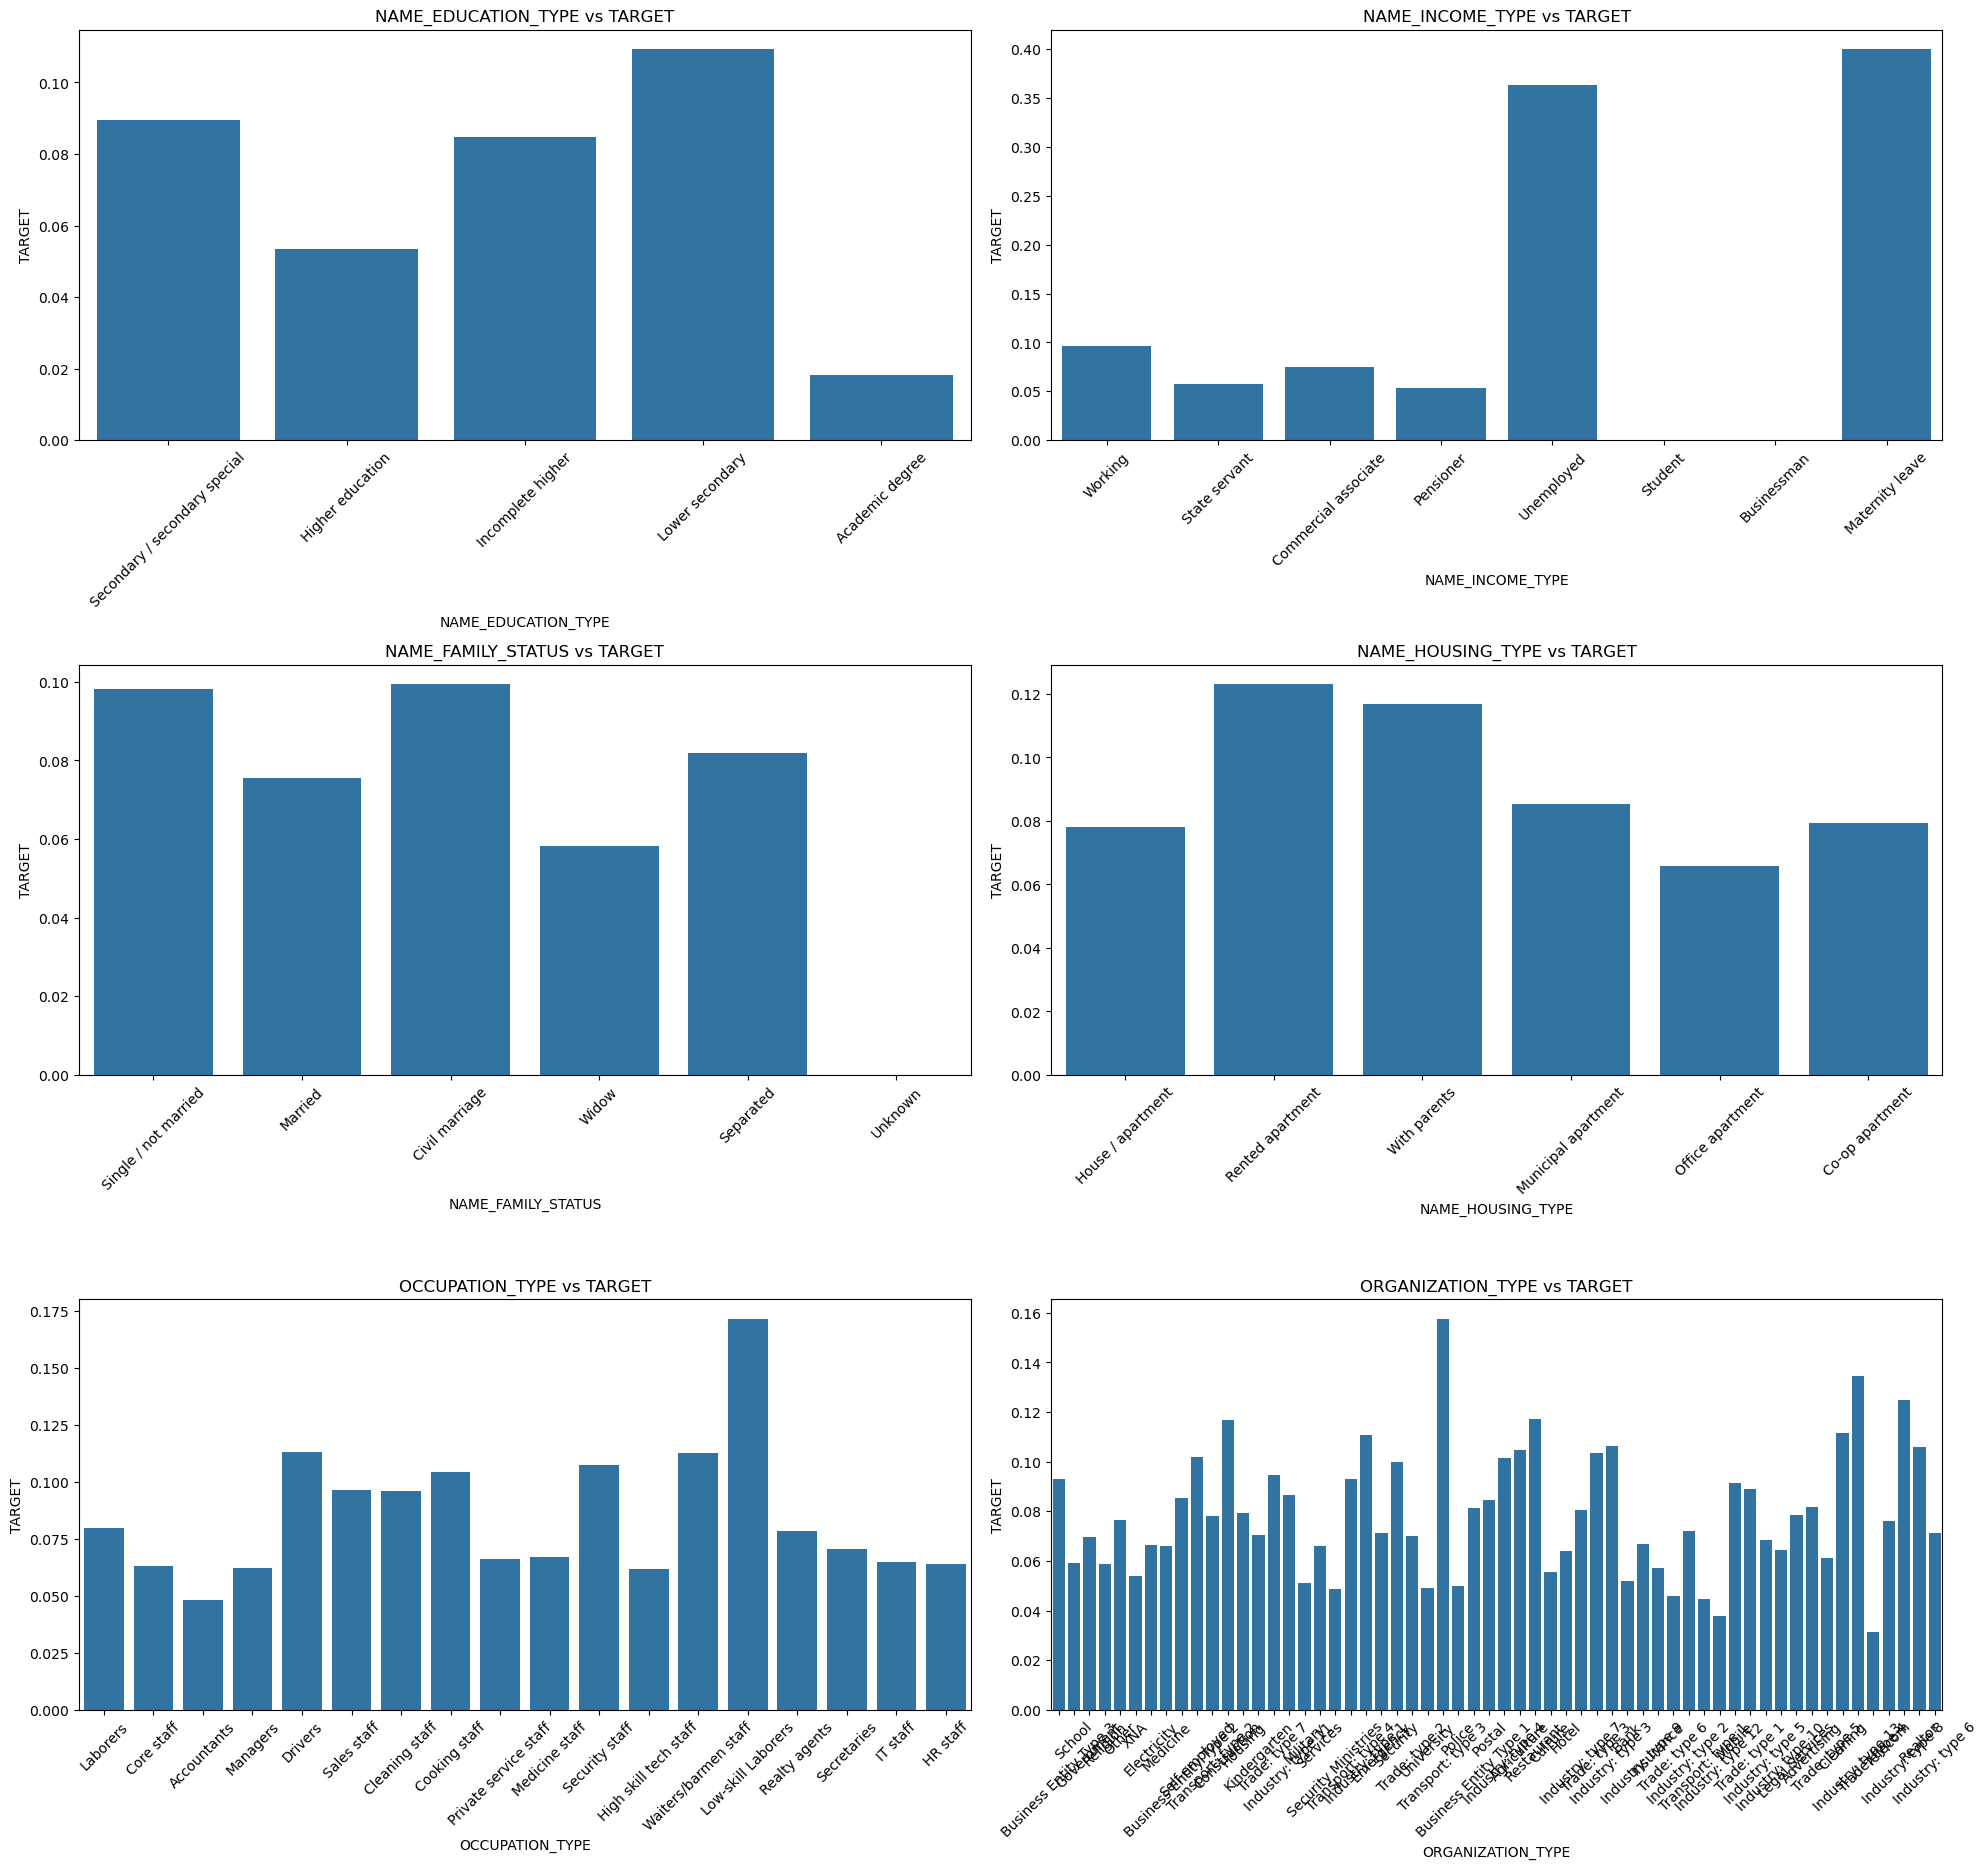

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# List your categorical columns
categorical_columns = ['NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS',
                       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE']

plt.figure(figsize=(20, 30))
for i, col in enumerate(categorical_columns):
    plt.subplot(5, 2, i + 1)
    sns.barplot(x=col, y='TARGET', data=application_df_cleaned, errorbar=None)
    plt.xticks(rotation=45)
    plt.title(f'{col} vs TARGET')
plt.tight_layout()
plt.show()



In [61]:
import pandas as pd

# Load the data
prev_app_df = pd.read_csv('previous_application.csv')

# Check the shape and first few rows
print("Shape of previous_application.csv:", prev_app_df.shape)
prev_app_df.head()


Shape of previous_application.csv: (1670214, 37)


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
# Percentage of missing values per column
missing_prev = prev_app_df.isnull().mean().sort_values(ascending=False) * 100

# Show columns with more than 30% missing data
missing_prev[missing_prev > 30]


RATE_INTEREST_PRIVILEGED     99.643698
RATE_INTEREST_PRIMARY        99.643698
AMT_DOWN_PAYMENT             53.636480
RATE_DOWN_PAYMENT            53.636480
NAME_TYPE_SUITE              49.119754
NFLAG_INSURED_ON_APPROVAL    40.298129
DAYS_TERMINATION             40.298129
DAYS_LAST_DUE                40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_FIRST_DUE               40.298129
DAYS_FIRST_DRAWING           40.298129
dtype: float64

In [67]:
# Drop high-missing-value columns
cols_to_drop_prev = ['RATE_INTEREST_PRIVILEGED', 'RATE_INTEREST_PRIMARY', 
                     'AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'NAME_TYPE_SUITE']
prev_app_df.drop(columns=cols_to_drop_prev, inplace=True)

# Impute binary flag (NFLAG_INSURED_ON_APPROVAL) with 0 - updated method
prev_app_df['NFLAG_INSURED_ON_APPROVAL'] = prev_app_df['NFLAG_INSURED_ON_APPROVAL'].fillna(0)

# Impute DAYS_* columns with median - updated method
days_cols = ['DAYS_TERMINATION', 'DAYS_LAST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
             'DAYS_FIRST_DUE', 'DAYS_FIRST_DRAWING']
for col in days_cols:
    prev_app_df[col] = prev_app_df[col].fillna(prev_app_df[col].median())


KeyError: "['RATE_INTEREST_PRIVILEGED', 'RATE_INTEREST_PRIMARY', 'AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'NAME_TYPE_SUITE'] not found in axis"

In [69]:
# Impute binary flag (NFLAG_INSURED_ON_APPROVAL) with 0
prev_app_df['NFLAG_INSURED_ON_APPROVAL'] = prev_app_df['NFLAG_INSURED_ON_APPROVAL'].fillna(0)

# Impute DAYS_* columns with median
days_cols = ['DAYS_TERMINATION', 'DAYS_LAST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
             'DAYS_FIRST_DUE', 'DAYS_FIRST_DRAWING']

for col in days_cols:
    prev_app_df[col] = prev_app_df[col].fillna(prev_app_df[col].median())


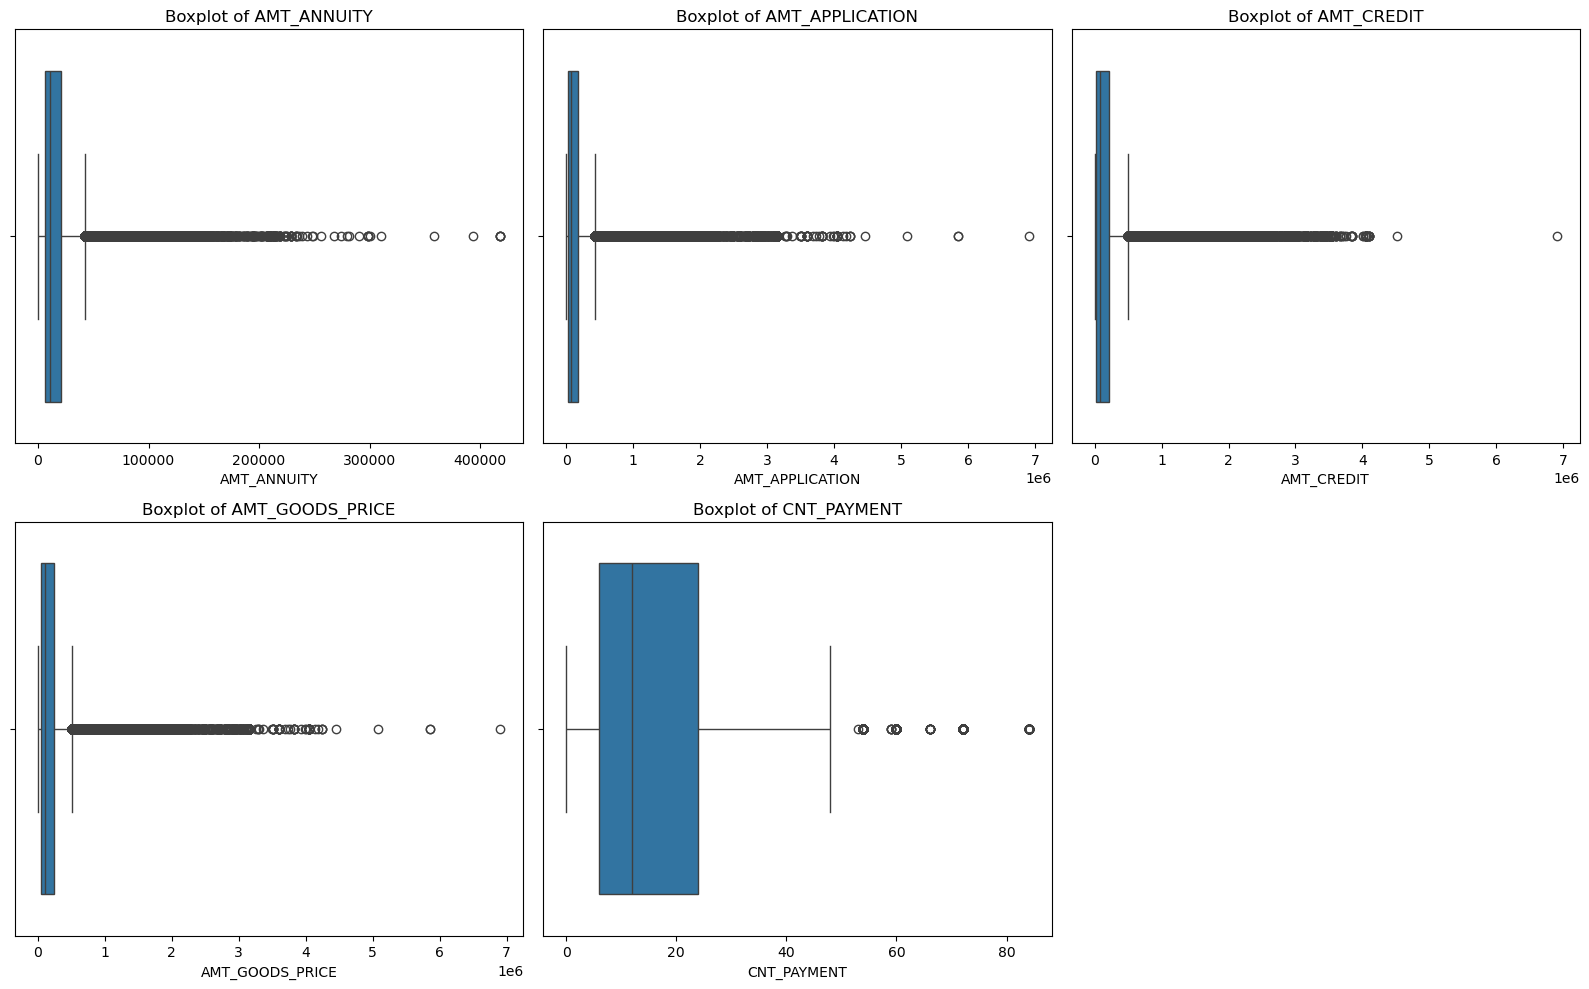

Outliers detected using IQR method:
AMT_ANNUITY: 82762 outliers
AMT_APPLICATION: 208019 outliers
AMT_CREDIT: 179989 outliers
AMT_GOODS_PRICE: 145715 outliers
CNT_PAYMENT: 55903 outliers


In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of key numeric columns
num_cols = ['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'CNT_PAYMENT']

# Boxplots to visually inspect outliers
plt.figure(figsize=(16, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=prev_app_df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# IQR-based outlier detection
outlier_summary = {}
for col in num_cols:
    Q1 = prev_app_df[col].quantile(0.25)
    Q3 = prev_app_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = prev_app_df[(prev_app_df[col] < lower_bound) | (prev_app_df[col] > upper_bound)]
    outlier_summary[col] = len(outliers)

# Show number of outliers in each column
print("Outliers detected using IQR method:")
for col, count in outlier_summary.items():
    print(f"{col}: {count} outliers")


In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Value counts
target_counts = app_df['TARGET'].value_counts()
target_percent = app_df['TARGET'].value_counts(normalize=True) * 100

print("Target Variable Distribution:")
print(target_counts)
print("\nPercentage Distribution:")
print(target_percent)

# Step 2: Bar plot
plt.figure(figsize=(6, 4))
sns.countplot(data=app_df, x='TARGET', palette='Set2')
plt.title('Target Variable Distribution')
plt.xticks([0, 1], ['Non-Defaulters (0)', 'Defaulters (1)'])
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

# Step 3: Pie chart
plt.figure(figsize=(6, 6))
plt.pie(target_counts, labels=['Non-Defaulters (0)', 'Defaulters (1)'], autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon'])
plt.title('Target Variable - Class Imbalance')
plt.show()


NameError: name 'app_df' is not defined

In [86]:
import pandas as pd

# Load application_data.csv
app_df = pd.read_csv('application_data.csv')

# Confirm loading
print("Shape:", app_df.shape)
print(app_df[['SK_ID_CURR', 'TARGET']].head())


Shape: (307511, 122)
   SK_ID_CURR  TARGET
0      100002       1
1      100003       0
2      100004       0
3      100006       0
4      100007       0


Target Variable Distribution (Counts):
TARGET
0    282686
1     24825
Name: count, dtype: int64

Target Variable Distribution (Percentages):
TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64


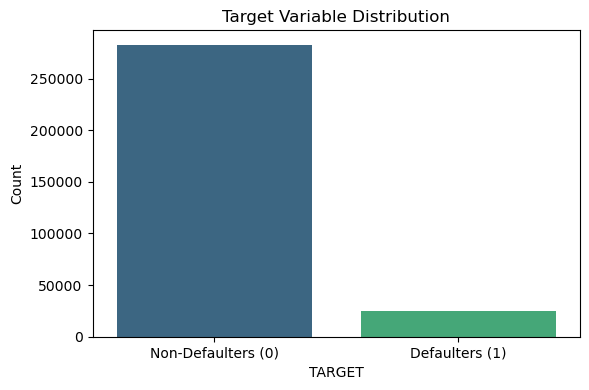

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Value counts and percentage
target_counts = app_df['TARGET'].value_counts().sort_index()
target_percent = app_df['TARGET'].value_counts(normalize=True).sort_index() * 100

print("Target Variable Distribution (Counts):")
print(target_counts)
print("\nTarget Variable Distribution (Percentages):")
print(target_percent)

# Prepare data for seaborn
target_df = pd.DataFrame({
    'TARGET': ['Non-Defaulters (0)', 'Defaulters (1)'],
    'Count': target_counts.values
})

# Plot with hue matching 'TARGET' to avoid warning
plt.figure(figsize=(6, 4))
sns.barplot(data=target_df, x='TARGET', y='Count', hue='TARGET', palette='viridis', legend=False)
plt.title('Target Variable Distribution')
plt.ylabel('Count')
plt.xlabel('TARGET')
plt.tight_layout()
plt.show()



In [96]:
# Merge previous_application.csv with application_data.csv on SK_ID_CURR
merged_df = pd.merge(prev_app_df, app_df, on='SK_ID_CURR', how='left')

# Confirm shape and quick look
print("Merged DataFrame shape:", merged_df.shape)
merged_df.head()


Merged DataFrame shape: (1670214, 153)


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE_x,AMT_ANNUITY_x,AMT_APPLICATION,AMT_CREDIT_x,AMT_GOODS_PRICE_x,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,FLAG_LAST_APPL_PER_CONTRACT,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,8.0


In [98]:
# Merge previous and current application datasets on SK_ID_CURR
merged_df = pd.merge(prev_app_df, app_df, on='SK_ID_CURR', how='left')

# Display shape and a few rows to confirm
print("✅ Merged DataFrame shape:", merged_df.shape)
merged_df.head()


✅ Merged DataFrame shape: (1670214, 153)


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE_x,AMT_ANNUITY_x,AMT_APPLICATION,AMT_CREDIT_x,AMT_GOODS_PRICE_x,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,FLAG_LAST_APPL_PER_CONTRACT,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,8.0


In [100]:
import numpy as np

# 1. Create subsets
target_1_df = app_df_merged[app_df_merged['TARGET'] == 1].copy()
target_0_df = app_df_merged[app_df_merged['TARGET'] == 0].copy()

# 2. Drop TARGET from each
target_1_df_no_target = target_1_df.drop(columns=['TARGET'])
target_0_df_no_target = target_0_df.drop(columns=['TARGET'])

# 3. Keep only numeric columns
target_1_numeric = target_1_df_no_target.select_dtypes(include=[np.number])
target_0_numeric = target_0_df_no_target.select_dtypes(include=[np.number])

# 4. Compute correlation matrices
corr_matrix_1 = target_1_numeric.corr()
corr_matrix_0 = target_0_numeric.corr()

# 5. Extract top 10 absolute correlations (excluding self-correlation)
def get_top_corr_pairs(corr_matrix, top_n=10):
    corr_unstacked = corr_matrix.abs().unstack()
    corr_unstacked = corr_unstacked[corr_unstacked < 1]  # exclude self-correlation
    corr_sorted = corr_unstacked.sort_values(ascending=False).drop_duplicates()
    top_pairs = corr_sorted.head(top_n)
    return top_pairs

# Get top pairs
top_corr_pairs_target_1 = get_top_corr_pairs(corr_matrix_1)
top_corr_pairs_target_0 = get_top_corr_pairs(corr_matrix_0)

# 6. Display
print("🔍 Top 10 Correlations for TARGET = 1 (Defaulters):\n")
print(top_corr_pairs_target_1)

print("\n🔍 Top 10 Correlations for TARGET = 0 (Non-Defaulters):\n")
print(top_corr_pairs_target_0)


NameError: name 'app_df_merged' is not defined

In [102]:
# Merge on SK_ID_CURR
app_df_merged = app_df.merge(prev_app_df, how='left', on='SK_ID_CURR')

# Optional: Print shape to confirm
print("✅ Merged Data Shape:", app_df_merged.shape)


✅ Merged Data Shape: (1430155, 153)


In [104]:
import numpy as np

# 1. Create subsets
target_1_df = app_df_merged[app_df_merged['TARGET'] == 1].copy()
target_0_df = app_df_merged[app_df_merged['TARGET'] == 0].copy()

# 2. Drop TARGET from each
target_1_df_no_target = target_1_df.drop(columns=['TARGET'])
target_0_df_no_target = target_0_df.drop(columns=['TARGET'])

# 3. Keep only numeric columns
target_1_numeric = target_1_df_no_target.select_dtypes(include=[np.number])
target_0_numeric = target_0_df_no_target.select_dtypes(include=[np.number])

# 4. Compute correlation matrices
corr_matrix_1 = target_1_numeric.corr()
corr_matrix_0 = target_0_numeric.corr()

# 5. Extract top 10 absolute correlations (excluding self-correlation)
def get_top_corr_pairs(corr_matrix, top_n=10):
    corr_unstacked = corr_matrix.abs().unstack()
    corr_unstacked = corr_unstacked[corr_unstacked < 1]  # exclude self-correlation
    corr_sorted = corr_unstacked.sort_values(ascending=False).drop_duplicates()
    top_pairs = corr_sorted.head(top_n)
    return top_pairs

# Get top pairs
top_corr_pairs_target_1 = get_top_corr_pairs(corr_matrix_1)
top_corr_pairs_target_0 = get_top_corr_pairs(corr_matrix_0)

# 6. Display
print("🔍 Top 10 Correlations for TARGET = 1 (Defaulters):\n")
print(top_corr_pairs_target_1)

print("\n🔍 Top 10 Correlations for TARGET = 0 (Non-Defaulters):\n")
print(top_corr_pairs_target_0)


🔍 Top 10 Correlations for TARGET = 1 (Defaulters):

DAYS_EMPLOYED             FLAG_EMP_PHONE              0.999789
AMT_APPLICATION           AMT_GOODS_PRICE_y           0.999676
YEARS_BUILD_MEDI          YEARS_BUILD_AVG             0.998453
OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE    0.998380
BASEMENTAREA_MEDI         BASEMENTAREA_AVG            0.998322
FLOORSMIN_AVG             FLOORSMIN_MEDI              0.998145
NONLIVINGAPARTMENTS_MODE  NONLIVINGAPARTMENTS_MEDI    0.998115
COMMONAREA_AVG            COMMONAREA_MEDI             0.997956
NONLIVINGAPARTMENTS_MEDI  NONLIVINGAPARTMENTS_AVG     0.997740
LIVINGAPARTMENTS_MEDI     LIVINGAPARTMENTS_AVG        0.997563
dtype: float64

🔍 Top 10 Correlations for TARGET = 0 (Non-Defaulters):

AMT_GOODS_PRICE_y         AMT_APPLICATION             0.999888
FLAG_EMP_PHONE            DAYS_EMPLOYED               0.999771
YEARS_BUILD_AVG           YEARS_BUILD_MEDI            0.998599
OBS_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE    0.9